# Investigating Boston Crime data

## Introduction


These dataset contains crime incident provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. It contains records from the new crime incident report system of Boston , which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.It has 2,60,760 rows and 17 columns starting from June 2015.

Source - https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system

### Importing required packages

Importing all the necessary packages required 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


### Importing Data set

In [2]:
df_c = pd.read_csv('../input/boston_crime.csv',
                 sep=',', header=0, parse_dates=["OCCURRED_ON_DATE"])

Let's preview the first 10 rows of the data set we just imported.

In [3]:
df_c.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192062057,619,Larceny,LARCENY ALL OTHERS,B3,444,NaN,2019-08-08 21:15:00,2019,8,Thursday,21,Part One,BLUE HILL AVE,42.295764,-71.087560,"(42.29576380, -71.08756002)"
1,I192062054,3115,Investigate Person,INVESTIGATE PERSON,D4,156,NaN,2019-08-08 21:04:00,2019,8,Thursday,21,Part Three,W CONCORD ST,42.339620,-71.076992,"(42.33961962, -71.07699237)"
2,I192062049,1402,Vandalism,VANDALISM,NaN,,NaN,2019-08-08 21:19:00,2019,8,Thursday,21,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192062044,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,162,NaN,2019-08-08 19:31:00,2019,8,Thursday,19,Part Three,HARRISON AVE,42.344967,-71.063822,"(42.34496729, -71.06382224)"
4,I192062043,3201,Property Lost,PROPERTY - LOST,D4,141,NaN,2019-08-08 19:15:00,2019,8,Thursday,19,Part Three,NEWBURY ST,42.348406,-71.086883,"(42.34840576, -71.08688339)"
5,I192062042,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,617,NaN,2019-08-08 19:08:00,2019,8,Thursday,19,Part Three,HUNTINGTON AVE,42.337923,-71.095266,"(42.33792266, -71.09526598)"
6,I192062039,3115,Investigate Person,INVESTIGATE PERSON,C11,359,NaN,2019-08-08 20:39:00,2019,8,Thursday,20,Part Three,WASHINGTON ST,42.294814,-71.072009,"(42.29481426, -71.07200871)"
7,I192062036,3115,Investigate Person,INVESTIGATE PERSON,B2,585,NaN,2019-08-08 20:09:00,2019,8,Thursday,20,Part Three,PARKER HILL AVE,42.330335,-71.107499,"(42.33033485, -71.10749865)"
8,I192062035,3410,Towed,TOWED MOTOR VEHICLE,B3,465,NaN,2019-08-08 19:04:00,2019,8,Thursday,19,Part Three,WILCOCK ST,42.286889,-71.092230,"(42.28688930, -71.09222991)"
9,I192062034,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,537,NaN,2019-08-08 20:03:00,2019,8,Thursday,20,Part Three,KOVEY RD,NaN,NaN,"(0.00000000, 0.00000000)"


### Exploring and Cleaning Data

There are 17 columns in our data set and below is the description of the each column.

- INCIDENT_NUMBER - Internal Internal BPD report number
- OFFENSE_CODE - Numerical code of offense description
- OFFENSE_CODE_GROUP - Internal categorization of [offense_description]
- OFFENSE_DESCRIPTION - Primary descriptor of incident
- DISTRICT - What district the crime was reported in
- REPORTING_AREA - RA number associated with the where the crime was reported from.
- SHOOTING - Indicated a shooting took place.
- OCCURRED_ON_DATE - Earliest date and time the incident could have taken place
- YEAR - Year derived from [OCCURRED_ON_DATE]
- MONTH - Month derived from [OCCURRED_ON_DATE]
- DAY_OF_WEEK - Day derived from [OCCURRED_ON_DATE]
- HOUR - Hour derived from [OCCURRED_ON_DATE]
- UCR_PART - Universal Crime Reporting Part number (1,2,3)
- STREET - Street name the incident took place
- Lat - Latitude dereived from [STREET]
- Long - Longitude derived from [STREET]
- Location - Lat and Long together derived from [STREET]

Let's see the total number of observations, number of columns and data type of each column in the data frame. Below is a custom function called `ExploreData`, which prints the number of rows, number of columns and the data type in any data frame.

In [4]:
def ExploreData(dtaframe):
    """
    This function print these features of a data frame:
    1. Number of Rows
    2. Number of Columns
    3. Column names and their data types

    :dtaframe: Takes data frame as the input:

    """
    print("\nNumber of Columns: {}".format(len(dtaframe.columns)))
    print("\nNumber of Rows: {}".format(len(dtaframe)))
    print("\nColumns and their data types: \n\n{}".format(dtaframe.dtypes))

In [5]:
ExploreData(df_c)


Number of Columns: 17

Number of Rows: 411033

Columns and their data types: 

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object


Below is a custom function `PrintColValues()` which takes the data frame as the input and returns the unique values present in each column of that data frame. If any column has more than 30 uniques values, then this function prints the number of unique values the column has.

In [6]:
def PrintColValues(dataframe):
    """
    This function finds the uniques values present in each column in a data frame and prints it.
    The output is column name along with the unique values it has.
    If a column has more than 30 unique values, then it just print the number of unique values that column has.

    :dataframe: Takes data frame as the input:

    """
    for c in list(dataframe.columns):
        n = dataframe[c].unique()
        if len(n) < 30:
            print(c)
            print(n)
        else:
            print(c + ': ' + str(len(n)) + ' unique values')

In [7]:
PrintColValues(df_c)

INCIDENT_NUMBER: 361921 unique values
OFFENSE_CODE: 222 unique values
OFFENSE_CODE_GROUP: 67 unique values
OFFENSE_DESCRIPTION: 244 unique values
DISTRICT
['B3' 'D4' nan 'C11' 'B2' 'E18' 'E5' 'D14' 'E13' 'C6' 'A1' 'A7' 'A15']
REPORTING_AREA: 880 unique values
SHOOTING
[nan 'Y']
OCCURRED_ON_DATE: 298279 unique values
YEAR
[2019 2015 2018 2017 2016]
MONTH
[ 8  7  5  3  6  9  1 11 12  4 10  2]
DAY_OF_WEEK
['Thursday' 'Wednesday' 'Monday' 'Saturday' 'Friday' 'Tuesday' 'Sunday']
HOUR
[21 19 20 18 17  9 15 10 16 14  0 12 13 11  7  1  8 23  2  6  5  4  3 22]
UCR_PART
['Part One' 'Part Three' 'Part Two' nan 'Other']
STREET: 4852 unique values
Lat: 18807 unique values
Long: 18809 unique values
Location: 18825 unique values


### Missing Value Treatment

Before treating missing values, we need to make sure that that does not have any blank cells. This is because, Python consider NaN as missing values but if there is any empyt cell, then it won't. Hence, converting any empty space to NaN, which python can undertand as missing value.

In [8]:
df_c = df_c.replace("", np.nan, regex=True)

Let's see how many columns have missing values.

In [9]:
Col_List = list(df_c.columns)
df_c[Col_List].isnull().sum().sort_values(ascending = False)

SHOOTING               409347
Lat                     26236
Long                    26236
STREET                  12106
DISTRICT                 2131
UCR_PART                  109
Location                    0
REPORTING_AREA              0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
YEAR                        0
OCCURRED_ON_DATE            0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
INCIDENT_NUMBER             0
dtype: int64

Now we see a lot of missing values in column `SHOOTING`. This is because, only those cases where shooting occured is reported and rest are left blanks. Hence, filling these blanks with N to indicate "No Shooting".

In [10]:
# Replace Nan with N in Shooting columns 
df_c['SHOOTING'] = df_c['SHOOTING'].replace(np.nan, 'N')

Checking the missing values again to make sure 'SHOOTING' column does not have any missing values.

In [11]:
df_c[Col_List].isnull().sum().sort_values(ascending = False)

Lat                    26236
Long                   26236
STREET                 12106
DISTRICT                2131
UCR_PART                 109
Location                   0
REPORTING_AREA             0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
YEAR                       0
SHOOTING                   0
OCCURRED_ON_DATE           0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
INCIDENT_NUMBER            0
dtype: int64

Now we will remove those rows where there is any missing value. 

In [12]:
df_c = df_c.dropna(how='any')

Making sure we don't get any missing values left.

In [13]:
df_c[Col_List].isnull().sum().sort_values(ascending = False)

Location               0
OCCURRED_ON_DATE       0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
YEAR                   0
Long                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
INCIDENT_NUMBER        0
dtype: int64

Now we can see the district are codes like A1, A7 etc. and we are adding another column which will put the names of the districts in the data frame.

In [14]:
new_col = {'A1':'Downtown',
           'A15':'Charlestown',
           'A7':'East Boston',
           'B2':'Roxbury',
           'B3':'Mattapan',
           'C6':'South Boston',
           'C11':'Dorchester',
           'D4':'South End',
           'D14':'Brighton',
           'E5':'West Roxbury',
           'E13':'Jamaica Plain',
           'E18':'Hyde Park'}
df_c['DISTRICT_NAME'] = df_c['DISTRICT'].map(new_col) 
df_c.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DISTRICT_NAME
0,I192062057,619,Larceny,LARCENY ALL OTHERS,B3,444,N,2019-08-08 21:15:00,2019,8,Thursday,21,Part One,BLUE HILL AVE,42.295764,-71.087560,"(42.29576380, -71.08756002)",Mattapan
1,I192062054,3115,Investigate Person,INVESTIGATE PERSON,D4,156,N,2019-08-08 21:04:00,2019,8,Thursday,21,Part Three,W CONCORD ST,42.339620,-71.076992,"(42.33961962, -71.07699237)",South End
3,I192062044,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,162,N,2019-08-08 19:31:00,2019,8,Thursday,19,Part Three,HARRISON AVE,42.344967,-71.063822,"(42.34496729, -71.06382224)",South End
4,I192062043,3201,Property Lost,PROPERTY - LOST,D4,141,N,2019-08-08 19:15:00,2019,8,Thursday,19,Part Three,NEWBURY ST,42.348406,-71.086883,"(42.34840576, -71.08688339)",South End
5,I192062042,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,617,N,2019-08-08 19:08:00,2019,8,Thursday,19,Part Three,HUNTINGTON AVE,42.337923,-71.095266,"(42.33792266, -71.09526598)",South End


### Analysis and Visualization

#### Most common types of crime in Boston

Now we will look at the frequency of each offense type. We will use a custom function to display the frequency of offense type, where n is used to display top n offense types.

In [15]:
def top_n(data_series, n):
    """
    This function print the top crime rate based on any varible we pass.

    :data_series: Takes the column name
    :n: The number of top records 

    """
    return data_series.value_counts().iloc[:n]

In [16]:
top_n(df_c['OFFENSE_CODE_GROUP'], n=10)

Motor Vehicle Accident Response    39028
Larceny                            32291
Medical Assistance                 29826
Investigate Person                 23076
Other                              21717
Simple Assault                     19244
Vandalism                          18631
Drug Violation                     18543
Verbal Disputes                    16902
Investigate Property               13848
Name: OFFENSE_CODE_GROUP, dtype: int64

We can further plot the frequency chart by Offense code group.

In [17]:
df_c.Lat.replace(-1, None, inplace=True)
df_c.Long.replace(-1, None, inplace=True)

Text(0.5, 1.0, 'Top Crime Count')

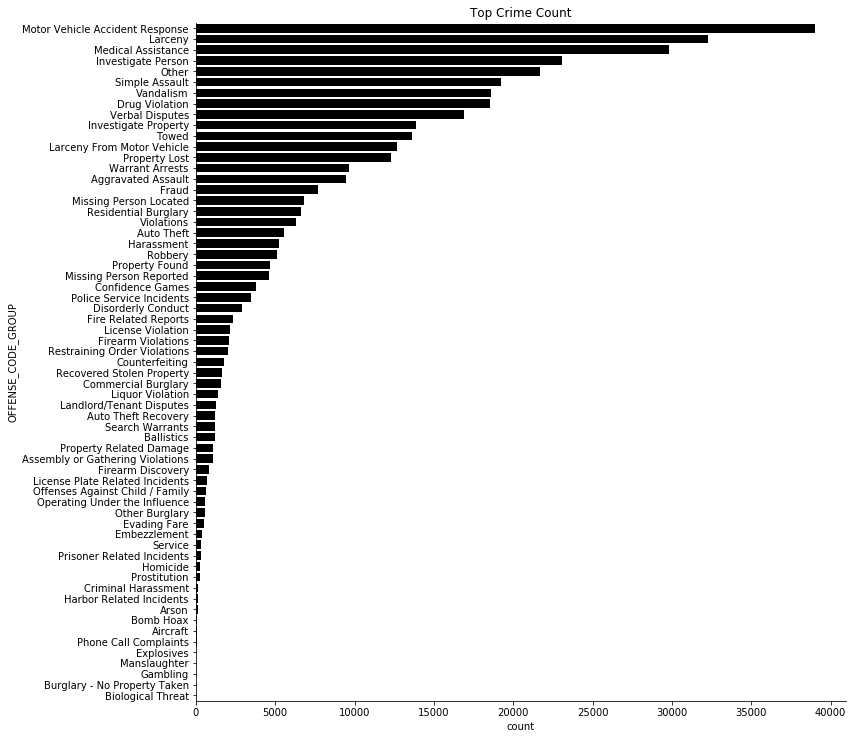

In [18]:
sns.catplot(y='OFFENSE_CODE_GROUP',
            kind='count',
            height=10,
            aspect = 1.2,
            color = "black",
            order=df_c.OFFENSE_CODE_GROUP.value_counts().index,
            data= df_c)
plt.title('Top Crime Count')

The most frequently occured offense code group is Motor Vehicle Accident Response. Let us further investigate into that offense code group

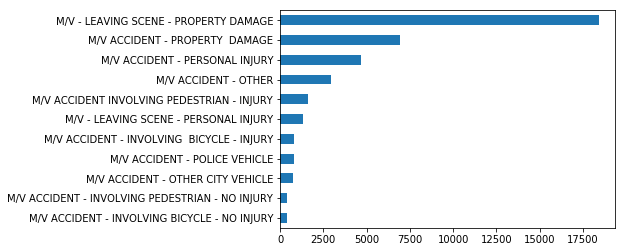

In [19]:
#lets look into the offense description and the frequency with respect to the offense group Motor Vehicle Accident Response
df_c['OFFENSE_DESCRIPTION'][df_c['OFFENSE_CODE_GROUP']== 'Motor Vehicle Accident Response'].value_counts().sort_values().plot.barh()

we can understand from the above that the most of the Motor Vehicle accidents led to the Property damages and the human injuries are comparitively less

#### Is it safe at night for civilians to go out?

Now we are plotting count of crimes by hour of a day to see what time of day has most crime.

Text(0.5, 1.0, 'crime count in a day')

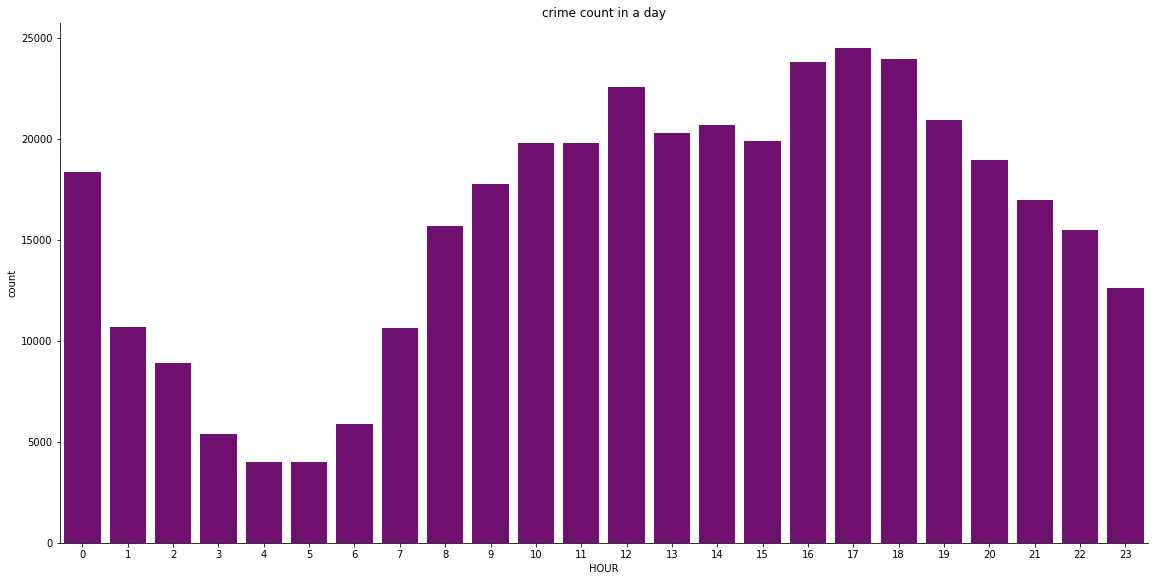

In [20]:
sns.catplot(x='HOUR',
            kind='count',
            height=8,
            aspect = 2,
            color = "purple",
            data= df_c)
plt.title('crime count in a day')

This graph tells us about the crime rate in a day. We can see that actually there are more crimes in the day time than the night. However, we can't say that it is safer to go out at night based on this. 

**Top areas with  crime**

Now we will see which are the areas with  crime.



Text(0.5, 1.0, 'crime separate by district')

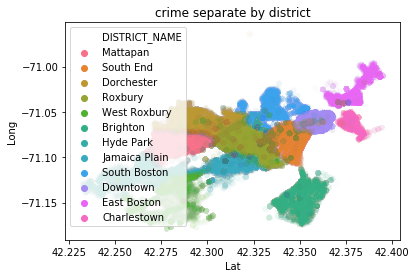

In [21]:
sns.scatterplot(x='Lat',
                y='Long',
                hue='DISTRICT_NAME',
                alpha = 0.01,
                data=df_c)
plt.title('crime separate by district')

This shows where most of the crime take place in the Boston area. These places are not safe to go, and we need to be careful.

#### Does the rate of crime decreased since 2015?

Let us see if the rate of crime has decreased since 2015.

Text(0.5, 1.0, 'crime rate in different year')

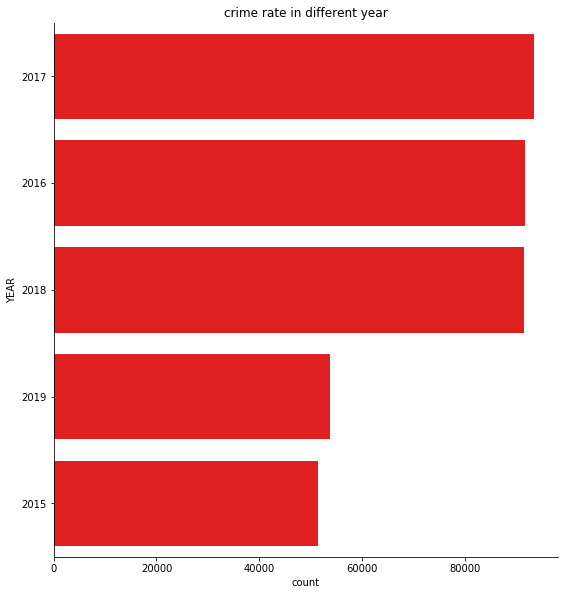

In [22]:
sns.catplot(y='YEAR',
            kind='count',
            height=8,
            aspect =1,
            color = "red",
            order=df_c.YEAR.value_counts().index,
            data= df_c)
plt.title('crime rate in different year')

This graph shows that the crime rate over the year. We can see that in 2018 the crime rate slightly decreased. For the 2019, we only have the data till now, so we can't conclude that there are less crimes this year.

#### Heat Map of Crime frequency in Boston

**1. Heat map of Crimes by Day and Hours**

To create a heat map to know what time and day of the week see most crimes in Boston, we first need to transform data in the reqequired format such that we have `HOUR` as rows and `DAY_OF_WEEK` as column headers and fill the table with count of incidents happened.

In [23]:
Transformed_DF = df_c.groupby(['HOUR', 'DAY_OF_WEEK']).INCIDENT_NUMBER.agg('count').reset_index()
Transformed_DF['DAY_OF_WEEK'] = pd.Categorical(Transformed_DF['DAY_OF_WEEK'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
Transformed_DF = Transformed_DF.pivot("HOUR", "DAY_OF_WEEK", "INCIDENT_NUMBER")
Transformed_DF.head()

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2485,2337,2422,2520,2578,3138,2907
1,1190,1182,1117,1206,1470,2121,2377
2,975,763,905,891,1135,2074,2156
3,653,548,507,638,642,1117,1298
4,462,468,456,520,529,760,826


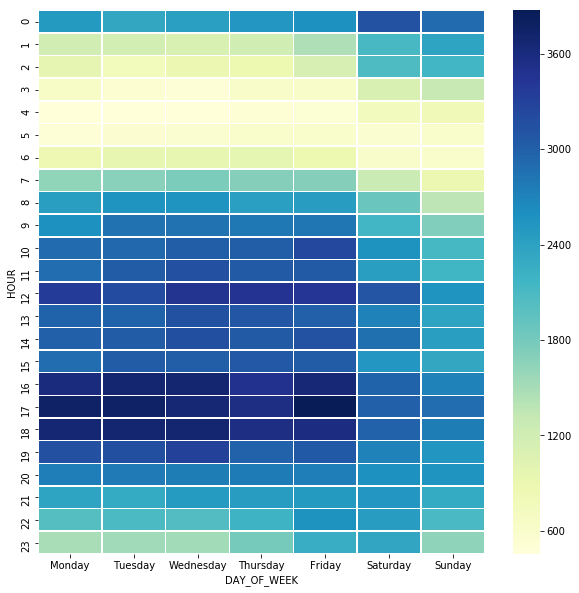

In [24]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(Transformed_DF, linewidths=.5, cmap="YlGnBu", ax= ax)

We can see that most crimes occur around evening between 4 PM to 8 PM and most common days weekdays i.e. from Monday to Friday.

**2. Heat map of Crimes by Month and Hours to know seasonality**

This will help in understanding if there is any change in crime rate in winter eriod as compared to summer.

In [25]:
Transformed_DF1 = df_c.groupby(['HOUR', 'MONTH']).INCIDENT_NUMBER.agg('count').reset_index()
Transformed_DF1 = Transformed_DF1.pivot("HOUR", "MONTH", "INCIDENT_NUMBER")
Transformed_DF1.head()

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
HOUR,,,,,,,,,,,,
0,1354,1244,1386,1417,1455,1872,2012,1733,1541,1577,1362,1434
1,927,820,790,769,801,989,1175,977,879,906,862,768
2,797,611,631,711,668,837,962,903,745,759,624,651
3,478,344,391,427,409,560,627,496,487,423,366,395
4,307,254,295,338,314,379,444,387,343,327,323,310


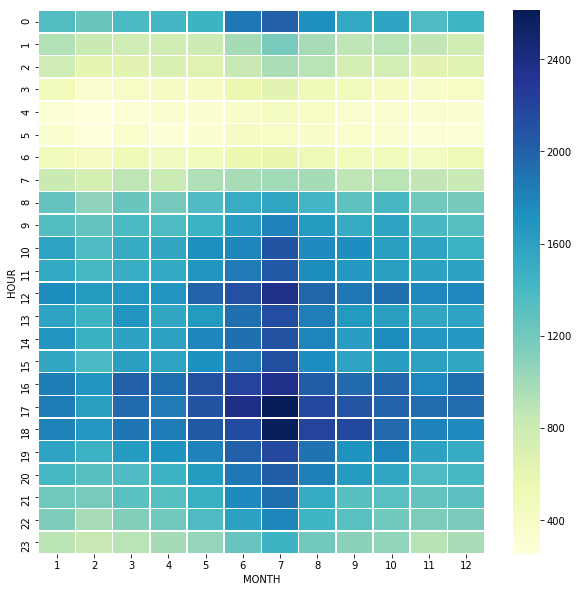

In [26]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(Transformed_DF1, linewidths=.5, cmap="YlGnBu", ax= ax)

Here there is a clear pattern of crime which correlates with seasonality in Boston. Summer months are usually June to August and we see maximum crime in those months. Also it is interesting to note that, Hours of day when crime is more is also during day time i.e. between 8 AM to 8 PM. So we can say that crime pattern is directly proportional to Boston temperature as it is expected that more people are out of their houses and on vacations. This is also the peak time for tourists to visit Boston, hence we see more crimes during this period. 

### Predictive Analytics

As seen above in heat maps, it seems most of the crime has occured in day time as opposed to night. The usual notion among population is that crime at night is more than that in day. However, the heat map is not showing what people usually think, related to the time of crime. So here we are performing 2 sample T-Test to see if it is statistically significant to say that there are more crimes in day as compared to night in Boston? 

**Definitions**

- Day time - 8 AM to 8 PM
- Night Time - 8 PM to 8 AM

_Drafting the Null and Alternate Hypothesis_

- Null hypothesis ($H_{0}$) - Crime at day is not more than at night
- Alternate hypothesis ($H_{a}$) - Crime at day is more than at night 

#### Transforming data for One-Sample T Test

Now we are transforming the data into day wise data with number of crimes occured in Day and Night.

In [27]:
df_c["Day_Crime"] = np.where(np.logical_and(df_c["HOUR"] >= 12, df_c["HOUR"] <= 20), 1, 0)
TTest_DF = df_c.resample('D', on='OCCURRED_ON_DATE').agg({'INCIDENT_NUMBER':'count','Day_Crime':'sum'}).reset_index()
TTest_DF["Night_Crime"] = TTest_DF["INCIDENT_NUMBER"] - TTest_DF["Day_Crime"]
TTest_DF = TTest_DF.rename(columns={"INCIDENT_NUMBER": "Total_Crime"})
print("The new data has {} rows".format(len(TTest_DF)))
print("\n\nBelow are the first 5 rows of the transformed dataframe.\n\n{}".format(TTest_DF.head()))

The new data has 1516 rows


Below are the first 5 rows of the transformed dataframe.

  OCCURRED_ON_DATE  Total_Crime  Day_Crime  Night_Crime
0       2015-06-15          239        124          115
1       2015-06-16          251        153           98
2       2015-06-17          226        103          123
3       2015-06-18          284        136          148
4       2015-06-19          276        154          122


#### Outlier Detection

Outliers are anomalous values in the data. Outliers tend to increase the estimate of sample variance, thus decreasing the calculated t statistic and lowering the chance of rejecting the null hypothesis. They may be due to recording errors, which may be correctable, or they may be due to the sample not being entirely from the same population. Apparent outliers may also be due to the values being from the same, but nonnormal, population. The boxplot and normal probability plot (normal Q-Q plot) may suggest the presence of outliers in the data. The one-sample t statistic is based on the sample mean and the sample variance of the sample values, both of which are sensitive to outliers. (In other words, neither the sample mean nor the sample variance is resistant to outliers, and thus, neither is the t statistic.) In particular, a large outlier can inflate the sample variance, decreasing the t statistic and thus perhaps eliminating a significant difference.

Below is a custom function created to detect outliers / anamolies. This function takes a 1-dimensional data frame or a column of a data frame as input and returns the outliers present in that particular column. It is using the 3-sigme rule to detect outlier i.e. any data point beyond 3 standard deviations from the mean is considered as an outlier.

In [28]:
def Remove_Outliers(dta, col):

    """
    This function is used to detect outliers using 3 sigma rule.
    That means any data point outside of 3 SD from the mean is an outlier.
    It takes 1-D data frame or a column as the input and returns a list of values which are outliers.

    :dta: Input data frame:
    :col: Input list of column or 1D data frame:

    """
    OldLen = len(dta)
    # Remove Outliers
    dta = dta[abs(dta[col] - dta[col].mean()) <= (3 * dta[col].std())]
    NewLen = len(dta)
    Num = OldLen - NewLen
    print("There were total {} outliers removed from the dataframe.".format(Num))

In [29]:
Remove_Outliers(TTest_DF, 'Day_Crime')

There were total 7 outliers removed from the dataframe.


In [30]:
Remove_Outliers(TTest_DF, 'Night_Crime')

There were total 11 outliers removed from the dataframe.


Now our data is free from outliers, so we can move ahead with the T test.

#### Normality and Skewness Check

**Normality** - The values in a sample may indeed be from the same population, but not from a normal one. Signs of nonnormality are skewness (lack of symmetry) or light-tailedness or heavy-tailedness. The boxplot, histogram, and normal probability plot (normal Q-Q plot), along with the normality test, can provide information on the normality of the population distribution. 

**Skewness** - If the population from which the data were sampled is skewed, then the one-sample t test may incorrectly reject the null hypothesis that the population mean is the hypothesized value even when it is true.

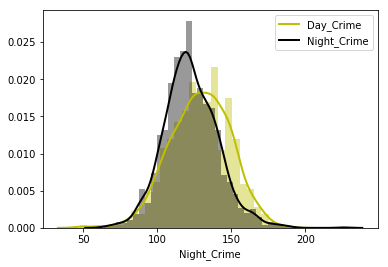

In [31]:
sns.distplot(TTest_DF['Day_Crime'], color="y", kde_kws={"color": "y", "lw": 2, "label": "Day_Crime"})
sns.distplot(TTest_DF['Night_Crime'],color="k", kde_kws={"color": "k", "lw": 2, "label": "Night_Crime"})
plt.show()

From the above chart, we can say that data is normally distributed and is not skewed. Hence, we are good to perform the T-Test.

#### Performing T-Test

A hypothesis test that is used to determine questions related to the mean in situations where data is collected from two random data samples. The two sample T-test is often used for evaluating the means of two variables or distinct groups, providing information as to whether the means between the two populations differs.

The null hypothesis, $H_{0}$ is the commonly accepted fact, it is the opposite of the alternate hypothesis ($H_{a}$). Researchers work to reject, nullify or disprove the null hypothesis. Researchers come up with an alternate hypothesis, one that they think explains a phenomenon, and then work to reject the null hypothesis.

- Null hypothesis ($H_{0}$) - Crime at day is not more than at night i.e. $\mu_{Day} \leq \mu_{Night}$  
- Alternate hypothesis ($H_{a}$) - Crime at day is more than at night i.e. $\mu_{Day} \gt \mu_{Night}$  

In [32]:
sample1 = TTest_DF['Day_Crime']
sample2 = TTest_DF['Night_Crime']

In [33]:
stats.ttest_ind(sample1,sample2, equal_var = False)

Ttest_indResult(statistic=8.906387177732167, pvalue=8.956906889591311e-19)

P-value is less than 0.01 and thus with 99% confidence we can reject the null hypothesis and say that **"Day Crime is more than Night crime"**

### Conclusion

Below are some of the observations and conclusions from the Boston Crime data.

- The most common type of crime is the Motor Vehicle Accidents which causes the dammage to the property.
- Larsen is the second most common type of crime.
- We can say with 99% confidence that crime at day is more than crime at night. 
- Crime is more in Summer season i.e. July to Septemeber as compared to other months.
- So suggest that people should be more careful in the Summer season and specially at day time as the theft rate is more at that time period.
